# Object detection

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 18.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

## General pipeline

![](doge.png)

## Bounding boxes for each cell

![](boxes.jpeg)

## How to define default boxes:

*   Manually (user make it by hands)
*   From train dataset (clusterise training boxes and take most popular)




## Standard output per cell

![](yolo.png)

## Real life case

![](real_life_yolo.jpeg)

## Correction prediction

![](correction_prediction.jpeg)

## How to choose optimal box

![](optimal_box.png)

In [ ]:
from PIL import Image
!wget -nv "https://www.learnopencv.com/wp-content/uploads/2021/01/person-segmentation.jpeg"

2023-04-03 18:04:24 URL:http://learnopencv.com/wp-content/uploads/2021/01/person-segmentation.jpeg [95431/95431] -> "person-segmentation.jpeg" [1]


(-0.5, 1534.5, 1023.5, -0.5)

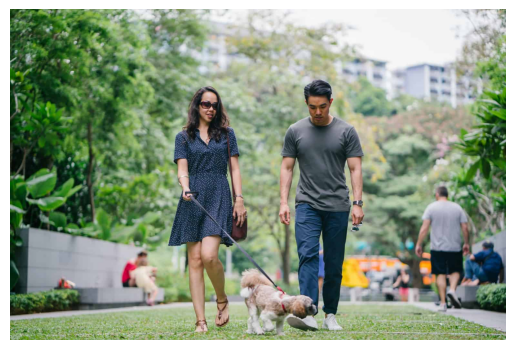

In [ ]:
img = Image.open("/content/person-segmentation.jpeg")
plt.imshow(img)
plt.axis("off")

In [ ]:
results = model('/content/person-segmentation.jpeg')


image 1/1 /content/person-segmentation.jpeg: 448x640 5 persons, 1 dog, 241.2ms
Speed: 1.1ms preprocess, 241.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
names = results[0].names

In [ ]:
labels = results[0].boxes.cls
labels_name = [names[label.item()] for label in labels]
labels_name

['person', 'person', 'person', 'dog', 'person', 'person']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

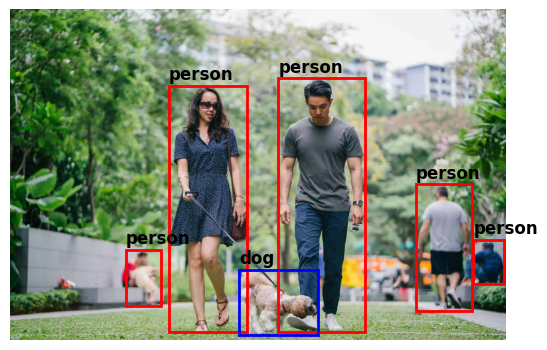

In [ ]:
fig, ax = plt.subplots()
ax.imshow(img)
for label_name,box in zip(labels_name,results[0].boxes.xywh):
  x,y,w,h = box
  x = x - w/2
  y = y - h/2
  c = "r" if label_name == "person" else "b"
  rect = plt.Rectangle((x,y), width=w, height=h, linewidth=2, edgecolor=c, facecolor='none')
  ax.add_patch(rect)
for label_name,box in zip(labels_name,results[0].boxes.xywh):
  x,y,w,h = box
  x = x - w/2
  y = y - h/2 - 20
  plt.text(x,y,label_name,fontsize=12,fontweight="bold")
plt.axis("off")
plt.show()